In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df1 = df.iloc[:, 2:]
df1.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## **Train test split**

In [4]:
X = df1.drop('Purchased',axis=1)
y = df1['Purchased']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [6]:
## Now check the descirbe 
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.575000,70589.285714
std,10.196005,33948.504534
min,18.000000,15000.000000
25%,30.000000,44000.000000
50%,37.000000,71000.000000
75%,45.000000,88000.000000
max,60.000000,150000.000000


## **StandardScaler**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # create an object of the class
scaler.fit(X_train)

StandardScaler()

In [8]:
## scaler instance is used to find the mean of the age and salary column you check in code scaler.mean_
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [9]:
## we transform both X_Train,X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [10]:
# X_train_scaled.describe()
# #<---------------------------------------------------------------------------
# AttributeError                            Traceback (most recent call last)
# e:\GitHub\100_days_ML\CampusX-ML\day24\file.ipynb Cell 12 in 1
# ----> 1 X_train_scaled.describe()

# AttributeError: 'numpy.ndarray' object has no attribute 'describe'>

In [11]:
## now we covert standardization in pandas df 
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [12]:
## After scaling mean in centralized and std is 1
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,-2.727977e-16,1.205385e-16
std,1.001791e+00,1.001791e+00
min,-1.923307e+00,-1.640391e+00
25%,-7.442683e-01,-7.846264e-01
50%,-5.649561e-02,1.211982e-02
75%,7.295303e-01,5.137749e-01
max,2.203329e+00,2.343340e+00


In [13]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


In [14]:
np.round(X_test_scaled.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,0.0,-0.1
std,1.1,1.0
min,-1.9,-1.6
25%,-0.9,-0.9
50%,-0.1,-0.2
75%,0.9,0.5
max,2.2,2.3


## **Effect of Scaling**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

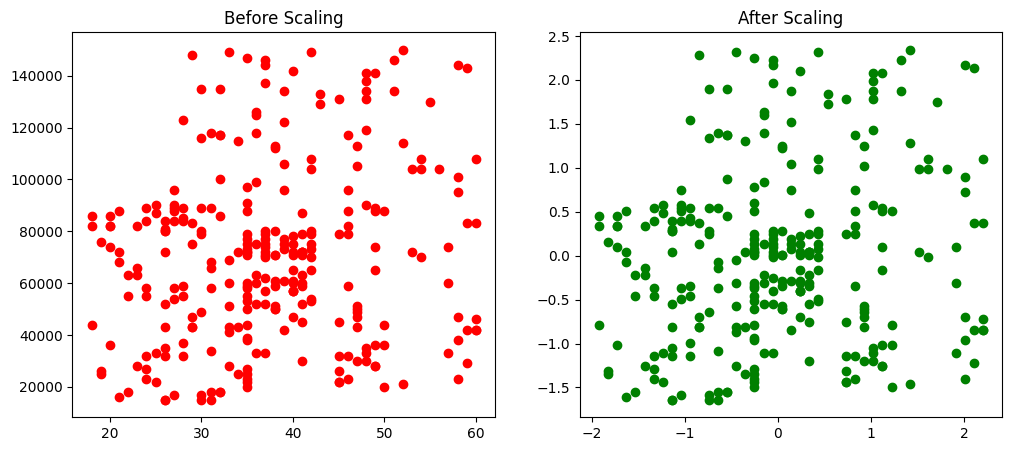

In [15]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color ='red')
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color= 'green')
ax2.set_title("After Scaling")
plt.show()

## **Kdeplot**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

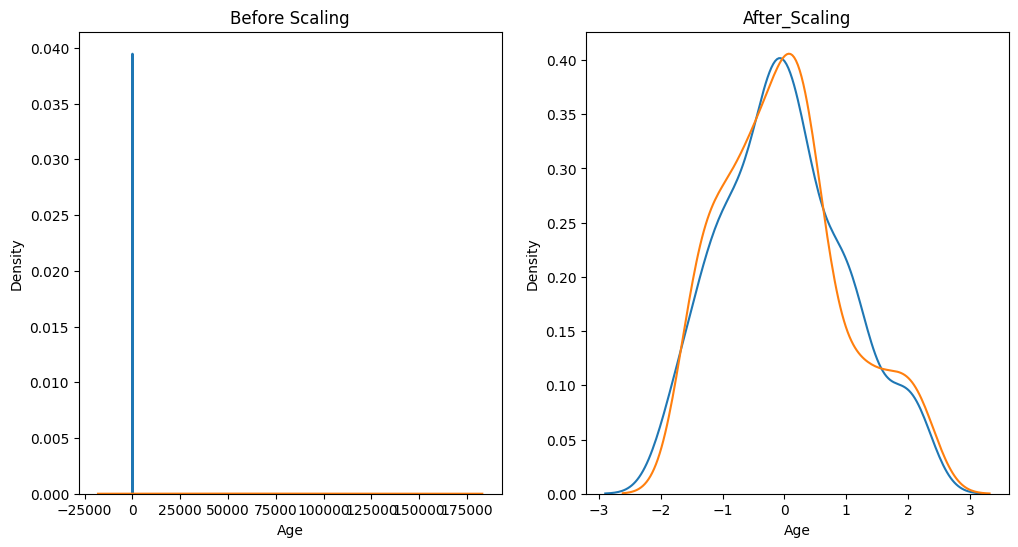

In [16]:
fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax = ax1)

ax2.set_title("After_Scaling")
sns.kdeplot(X_train_scaled['Age'],ax= ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()

## **Comparison of Distributions of Age Columns**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

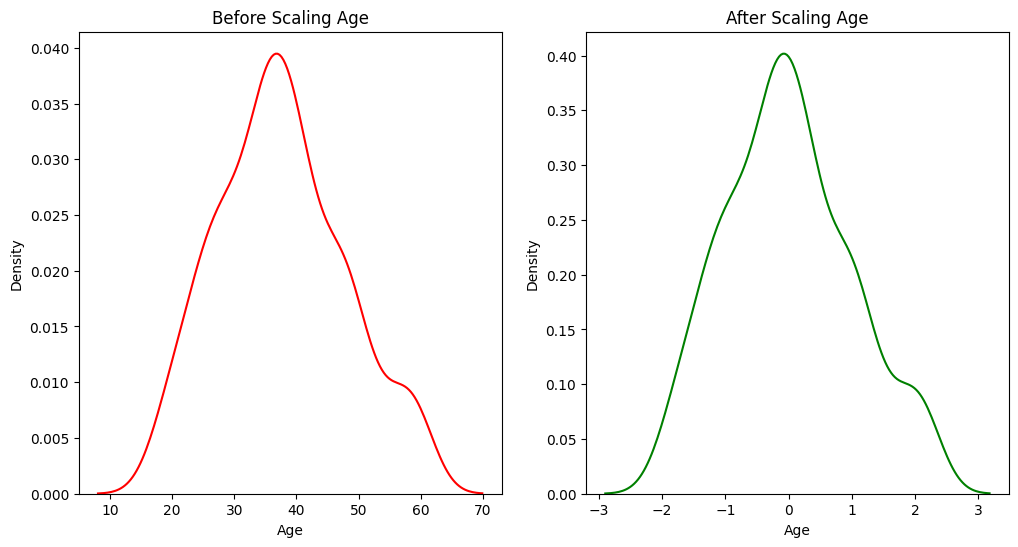

In [17]:
fig ,(ax1,ax2) = plt.subplots(ncols = 2,figsize=(12,6))

ax1.set_title("Before Scaling Age")
sns.kdeplot(X_train['Age'],color ='red',ax= ax1)

ax2.set_title("After Scaling Age")
sns.kdeplot(X_train_scaled['Age'],color = 'green',ax = ax2)
plt.show()

## **Comparison of Distributions of EstimatedSalary Columns**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

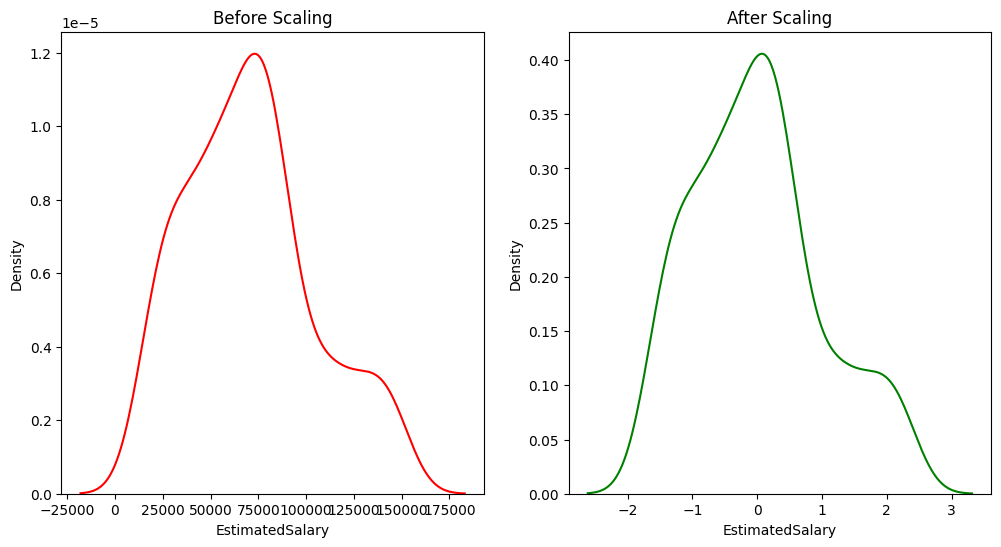

In [18]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize =(12,6))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'],color='red',ax= ax1)


ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],color='green',ax =ax2)
plt.show()

## **Why Scaling is Important**

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [21]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

## **Accuracy Score**

In [23]:
from sklearn.metrics import accuracy_score
print("Before Scaling  : ",accuracy_score(y_test,y_pred))
print("After Scaling   :",accuracy_score(y_test,y_pred_scaled))

Before Scaling  :  0.6083333333333333
After Scaling   : 0.85


## **Decision Tree**

Not Effect standarization on these Alogorithm
1. Decision Tree
2. Random Forest
3. GB
4. Xgboost

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [26]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [28]:
from sklearn.metrics  import accuracy_score
print("Before Scaling  : ",accuracy_score(y_test,y_pred))
print("After Scaling   :",accuracy_score(y_test,y_pred_scaled))

Before Scaling  :  0.8583333333333333
After Scaling   : 0.8416666666666667


## **Effect of Outlier**

In [29]:
print(df.shape)
df.head(1)

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0


In [39]:
df1 = df1.append(pd.DataFrame({"Age":[5,90,95],"EstimatedSalary":[1000,250000,350000],"Purchased":[0,1,1]}))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10976\1017357119.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame({"Age":[5,90,95],"EstimatedSalary":[1000,250000,350000],"Purchased":[0,1,1]}))


In [51]:
df1.shape

(403, 3)

In [42]:
df1.tail()

,Age,EstimatedSalary,Purchased
398,36,33000,0
399,49,36000,1
0,5,1000,0
1,90,250000,1
2,95,350000,1


<IPython.core.display.Javascript object>

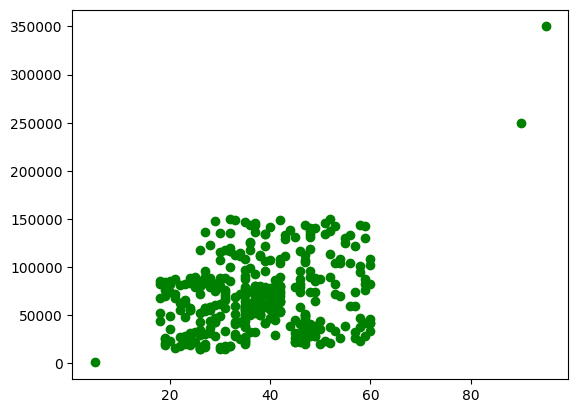

In [43]:
plt.scatter(df['Age'], df['EstimatedSalary'],color='green')

In [52]:
X = df1.drop('Purchased',axis=1)
y = df1['Purchased']

In [56]:
print(X.shape)
X.head(2)

(403, 2)


,Age,EstimatedSalary
0,19,19000
1,35,20000


In [57]:
print(y.shape)
y.head(2)

(403,)


0    0
1    0
Name: Purchased, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((282, 2), (121, 2))

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

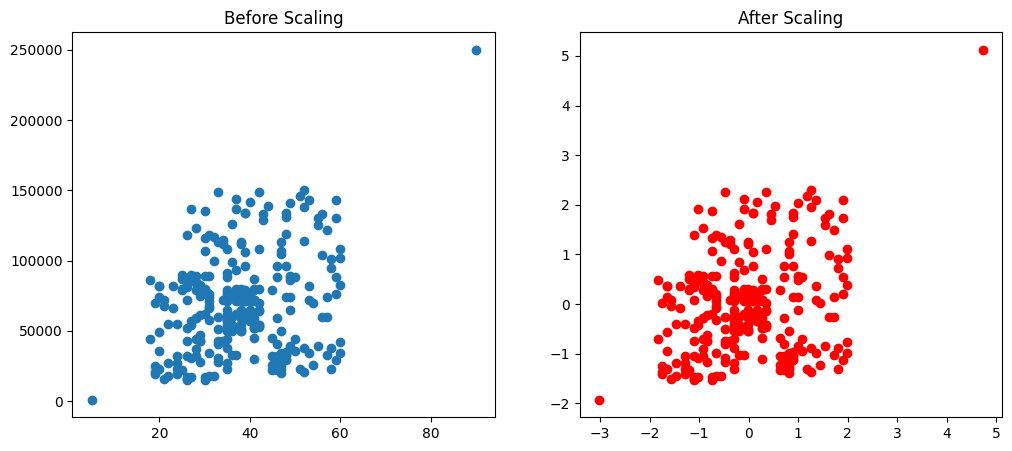

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()